<a href="https://colab.research.google.com/github/wanwanliang/ML_Projects/blob/main/notebook/Neural_network_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= '0.20'
import os
import numpy as np
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter = 1000, tol=1e-3, random_state=42)
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

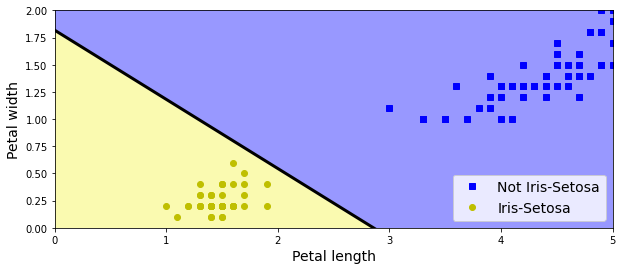

In [ ]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y==1,0], X[y==1,1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

## Activation functions

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def relu(z):
  return np.maximum(0,z)

def tanh(z):
  return(np.tanh(z))

def step(z):
  return(np.sign(z))


def derivative(f, z, eps=0.000001):
  return (f(z+eps)-f(z-eps))/(2*eps)

(-5.0, 5.0, -0.2, 1.2)

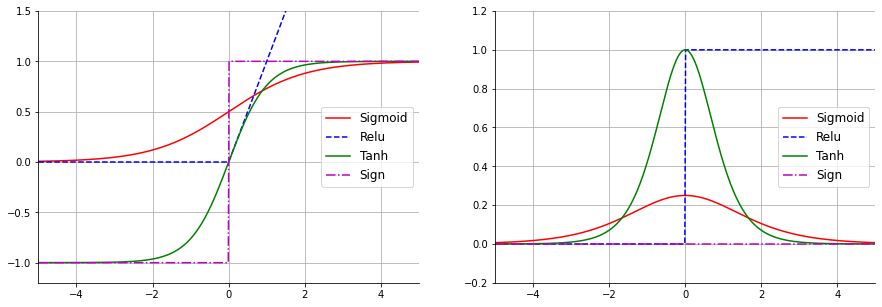

In [ ]:
x = np.linspace(-5, 5, 500)
sig = sigmoid(x)
rel = relu(x)
tan = tanh(x)
sig2 = step(x)

sig_der = derivative(sigmoid, x, eps=0.000001)
rel_der = derivative(relu, x, eps=1e-6)
tan_der = derivative(tanh, x, eps=1e-6)
sig2_der = derivative(step, x, eps=1e-6)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.grid('True')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(x, sig, 'r-', label="Sigmoid")
plt.plot(x, rel, 'b--', label="Relu")
plt.plot(x, tan,'g-', label="Tanh")
plt.plot(x, sig2,"m-." ,label="Sign")
plt.legend(loc="center right", fontsize=12)
plt.axis([-5,5,-1.2,1.5])


plt.subplot(122)
plt.grid('True')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(x, sig_der, 'r-', label="Sigmoid")
plt.plot(x, rel_der, 'b--', label="Relu")
plt.plot(x, tan_der,'g-', label="Tanh")
plt.plot(x, sig2_der,"m-." ,label="Sign")
plt.legend(loc="center right", fontsize=12)
plt.axis([-5,5,-0.2,1.2])


## MLP - Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print('TF version:',tf.__version__)
print('Keras version:', keras.__version__)

TF version: 2.3.0
Keras version: 2.4.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

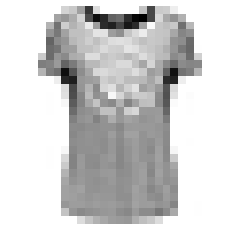

In [ ]:
plt.imshow(X_train[1], cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
pd.DataFrame(y_train).value_counts()

0    5543
4    5512
8    5510
6    5507
5    5507
3    5499
2    5496
9    5494
7    5488
1    5444
dtype: int64

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[2]

'Pullover'

In [ ]:
y_train[:5]

array([4, 0, 7, 9, 9], dtype=uint8)

In [ ]:
class_names[y_train[20]]

'Sneaker'

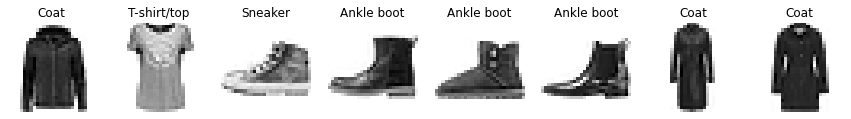

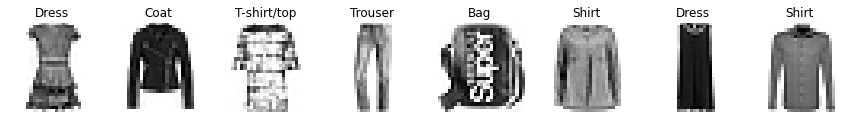

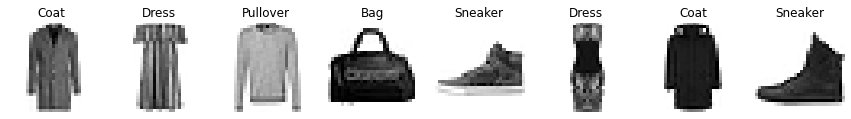

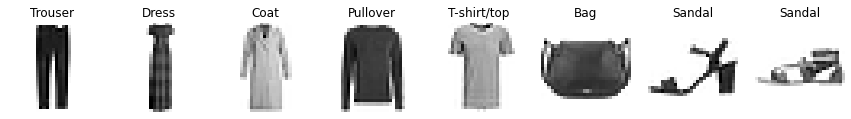

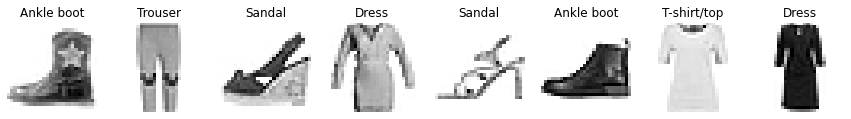

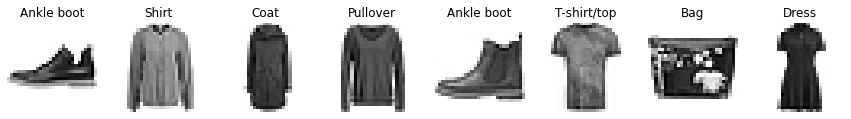

In [ ]:
n_rows = 6
n_cols = 8

for row in range(n_rows):
  plt.figure(figsize=(15,12))
  for col in range(n_cols):

    n_img = row*n_cols + col + 1

    plt.subplot(n_rows, n_cols, n_img)
    plt.imshow(X_train[n_img-1], cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_train[n_img -1]], fontsize=12)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# or

model = keras.models.Sequential([
   keras.layers.Flatten(input_shape=[28,28]),                              
   keras.layers.Dense(300, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')

])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

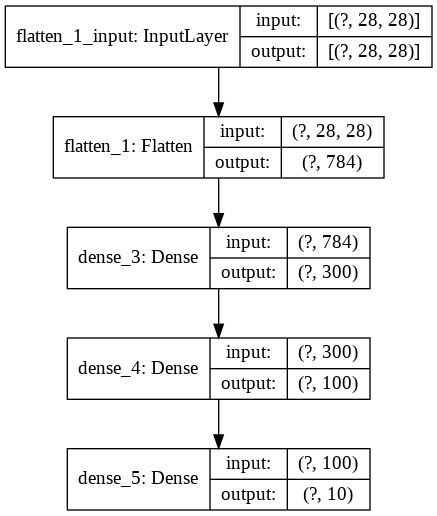

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [ ]:
model.layers

In [ ]:
layer0 = model.layers[0]

In [ ]:
layer0.name

'flatten_1'

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )

In [ ]:
# or
model.compile(loss= keras.losses.sparse_categorical_crossentropy,
       optimizer = keras.optimizers.SGD(),
       metrics = [keras.metrics.sparse_categorical_accuracy]       
              )

In [ ]:
fit_history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7134 - sparse_categorical_accuracy: 0.7660 - val_loss: 0.5215 - val_sparse_categorical_accuracy: 0.8238
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4883 - sparse_categorical_accuracy: 0.8291 - val_loss: 0.4364 - val_sparse_categorical_accuracy: 0.8520
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4444 - sparse_categorical_accuracy: 0.8435 - val_loss: 0.5225 - val_sparse_categorical_accuracy: 0.8030
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4183 - sparse_categorical_accuracy: 0.8547 - val_loss: 0.3988 - val_sparse_categorical_accuracy: 0.8638
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3995 - sparse_categorical_accuracy: 0.8609 - val_loss: 0.3845 - val_sparse_categorical_accuracy: 0.8672
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3803 - spars

In [ ]:
fit_history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [ ]:
fit_history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

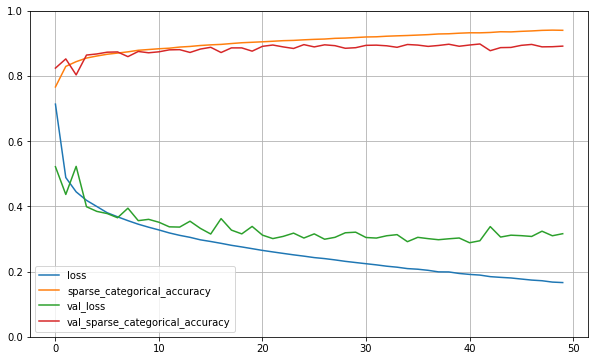

In [ ]:
pd.DataFrame(fit_history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3378 - sparse_categorical_accuracy: 0.8864


[0.33782094717025757, 0.8863999843597412]

In [ ]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_pred5 = y_pred[:5]

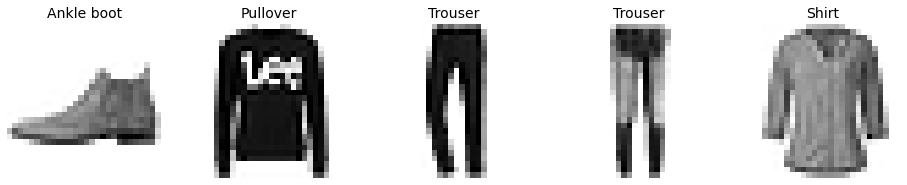

In [ ]:
plt.figure(figsize=(16,6))

for index, img in enumerate(X_test[:5]):

  plt.subplot(1,5,index+1)
  plt.imshow(img, cmap = 'binary', interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]], fontsize=14)
plt.show()

In [ ]:
np.array(class_names)[y_pred5]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

## MLP - Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(X_train.shape)

(11610, 8)


In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),  
  keras.layers.Dense(1)                               
])

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(lr=1e-3), metrics=[keras.metrics.mean_squared_error])

In [ ]:
fit_history1 = model.fit(X_train, y_train, epochs = 50, validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 1ms/step - loss: 1.6419 - mean_squared_error: 1.6419 - val_loss: 0.8560 - val_mean_squared_error: 0.8560
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - mean_squared_error: 0.7047 - val_loss: 0.6531 - val_mean_squared_error: 0.6531
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - mean_squared_error: 0.6345 - val_loss: 0.6099 - val_mean_squared_error: 0.6099
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - mean_squared_error: 0.5977 - val_loss: 0.5658 - val_mean_squared_error: 0.5658
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - mean_squared_error: 0.5706 - val_loss: 0.5355 - val_mean_squared_error: 0.5355
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - mean_squared_error: 0.5472 - val_loss: 0.5173 - val_mean_squared_error: 0.5173
Epoch 7/50
363/363 [========

In [ ]:
fit_history1.params

{'epochs': 50, 'steps': 363, 'verbose': 1}

In [ ]:
fit_history1.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [ ]:
his = pd.DataFrame(fit_history1.history)
print(his.head(5))
his2 = his.iloc[:,[0,2]]
print(his2.head(5))

       loss  mean_squared_error  val_loss  val_mean_squared_error
0  1.641871            1.641871  0.855952                0.855952
1  0.704696            0.704696  0.653076                0.653076
2  0.634542            0.634542  0.609898                0.609898
3  0.597736            0.597736  0.565842                0.565842
4  0.570629            0.570629  0.535460                0.535460
       loss  val_loss
0  1.641871  0.855952
1  0.704696  0.653076
2  0.634542  0.609898
3  0.597736  0.565842
4  0.570629  0.535460


In [ ]:
his2.columns
his2.columns = ['Train_loss', 'Validation_loss']
his2.columns

Index(['Train_loss', 'Validation_loss'], dtype='object')

No handles with labels found to put in legend.


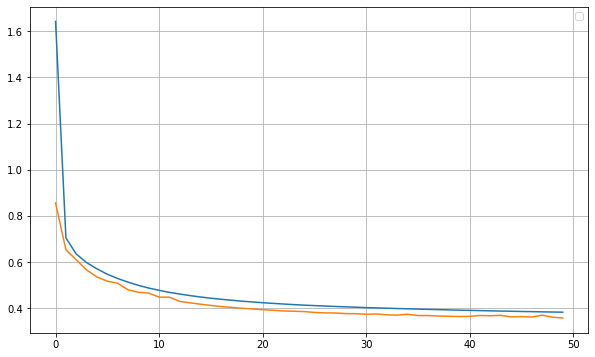

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(his2)
plt.grid('True')
plt.legend(loc='upper right')
plt.show()

## Functional API

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]         

In [ ]:
model.compile(loss = keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(lr=1e-3),metrics=[keras.metrics.mean_squared_error])
fit_history2 = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 881us/step - loss: 0.3578 - mean_squared_error: 0.3578


[0.35778748989105225, 0.35778748989105225]

In [ ]:
loss1 = pd.DataFrame(fit_history1.history['loss'])
loss2 = pd.DataFrame(fit_history2.history['loss'])

In [ ]:
print(loss1.head())
print(loss2.head())

          0
0  1.641871
1  0.704696
2  0.634542
3  0.597736
4  0.570629
          0
0  1.261135
1  0.658015
2  0.587849
3  0.558221
4  0.534745


In [ ]:
loss1.columns=['Loss Sequential NN']
loss1['Loss Functional NN'] = loss2
loss1.head()

,Loss Sequential NN,Loss Functional NN
0,1.641871,1.261135
1,0.704696,0.658015
2,0.634542,0.587849
3,0.597736,0.558221
4,0.570629,0.534745


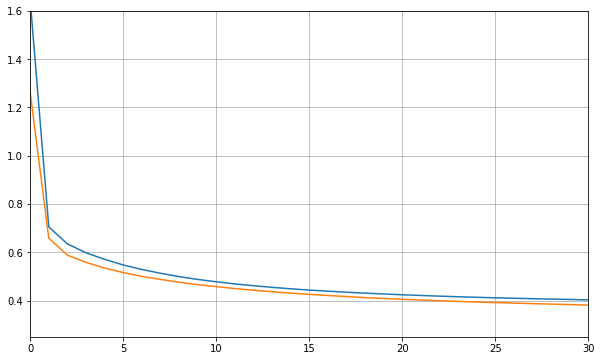

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(loss1)
plt.gca().set_xlim(0, 30)
plt.gca().set_ylim(0.25, 1.6)
plt.grid(True)
plt.show()

### With different variables in different layers

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
fit_history3 = model.fit((X_train_A, X_train_B), y_train, epochs=50, validation_data=((X_valid_A, X_valid_B), y_valid))

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
mse_test

162/162 [==============================] - 0s 800us/step - loss: 0.3912


0.39124810695648193

In [ ]:
loss1['Loss Functional NN Vars'] = pd.DataFrame(fit_history3.history['loss'])
loss1.head()

,Loss Sequential NN,Loss Functional NN,Loss Functional NN Vars
0,1.641871,1.261135,2.109356
1,0.704696,0.658015,0.784856
2,0.634542,0.587849,0.651682
3,0.597736,0.558221,0.596463
4,0.570629,0.534745,0.559452


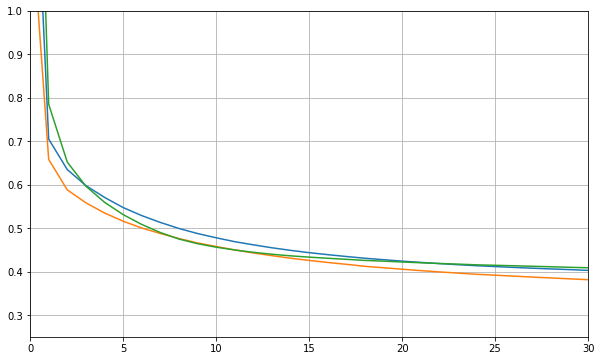

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(loss1)
plt.gca().set_xlim(0, 30)
plt.gca().set_ylim(0.25, 1)
plt.grid(True)
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(20, activation='relu')(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [76]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [78]:
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=50, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.0328 - main_output_loss: 0.8602 - aux_output_loss: 2.5863 - val_loss: 1.0649 - val_main_output_loss: 0.7688 - val_aux_output_loss: 3.7294
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.8480 - main_output_loss: 0.7266 - aux_output_loss: 1.9414 - val_loss: 0.9491 - val_main_output_loss: 0.6792 - val_aux_output_loss: 3.3784
Epoch 3/50
363/363 [==============================] - 1s 1ms/step - loss: 0.7602 - main_output_loss: 0.6629 - aux_output_loss: 1.6362 - val_loss: 0.8472 - val_main_output_loss: 0.6285 - val_aux_output_loss: 2.8149
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7072 - main_output_loss: 0.6201 - aux_output_loss: 1.4906 - val_loss: 0.7633 - val_main_output_loss: 0.5876 - val_aux_output_loss: 2.3440
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.6694 - main_output_loss: 0.5874 - aux_output_loss: 1.4079 - val_loss

In [84]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 974us/step - loss: 0.4157 - main_output_loss: 0.3908 - aux_output_loss: 0.6397


## Save and load models

In [86]:
model.save('test.h5')
model = keras.models.load_model('test.h5')

In [87]:
model.predict([X_test_A, X_test_B])

[array([[0.42894244],
        [2.0633297 ],
        [3.2947176 ],
        ...,
        [1.5441619 ],
        [2.523669  ],
        [3.726739  ]], dtype=float32), array([[0.7987665],
        [2.1985319],
        [2.628599 ],
        ...,
        [1.5810361],
        [1.8932593],
        [2.8223534]], dtype=float32)]

In [88]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 20)           620         dense_11[0][0]                   
_______________________________________________________________________________________

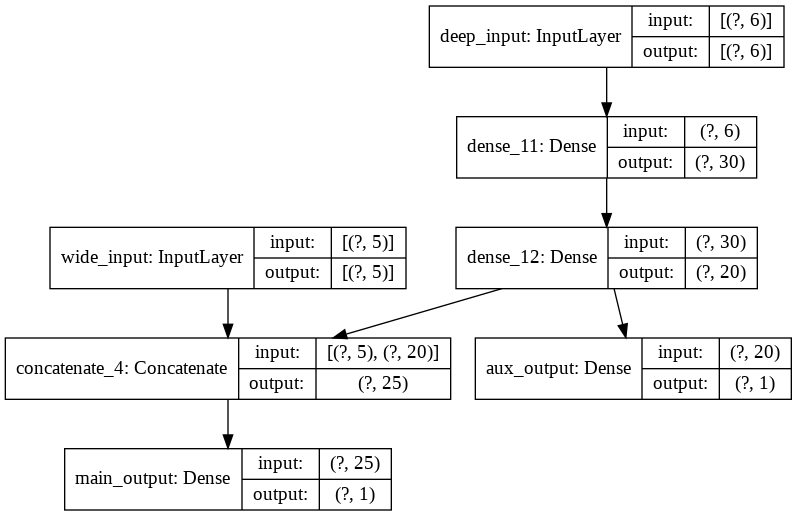

In [91]:
keras.utils.plot_model(model, show_shapes=True)

In [92]:
model.save_weights('test_weights.ckpt')
model.load_weights('test_weights.ckpt')

## Callbacks

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation='relu', input_shape=[8]),
  keras.layers.Dense(30, activation='relu'),
  keras.layers.Dense(1)
  ])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
fit_history4 = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

In [97]:
model = keras.models.load_model('my_keras_model.h5')
eva = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 850us/step - loss: 0.3576


## Hyperparameter Tuning

In [124]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [125]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [118]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [127]:
keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 910us/step - loss: 0.3346


-0.33461153507232666

In [132]:
np.random.seed(42)
tf.random.set_seed(42)

In [133]:
import scipy
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_layer': [1,2,3],
    'n_neuron': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [ ]:
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data = (X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [135]:
rnd_search_cv.best_params_

{'learning_rate': 0.008339092654580042, 'n_layer': 2, 'n_neuron': 38}

In [145]:
rnd_search_cv.best_score_

-0.33589668075243634

In [146]:
model = rnd_search_cv

In [147]:
model

5

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)